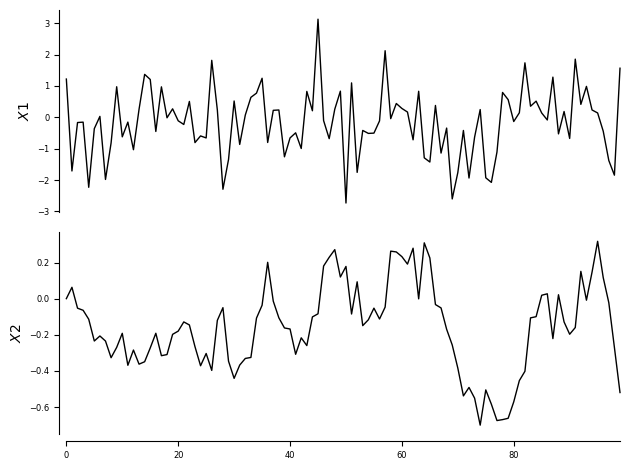

Text(0, 0.5, '$X 2$')

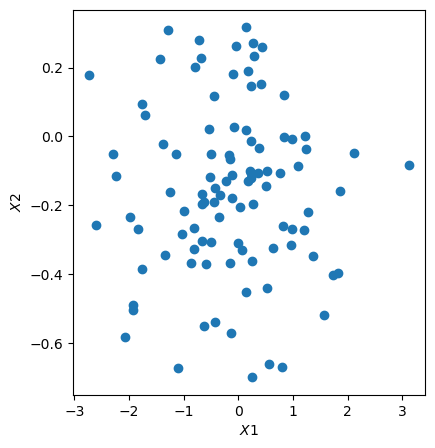

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tigramite
from tigramite import data_processing as pp
from tigramite import plotting as tp
from tigramite.pcmci import PCMCI
from tigramite.independence_tests import parcorr, gpdc, cmiknn
import pandas as pd


TN = np.random.normal(size=100)

# Parameters for the model
tau = 10  # Characteristic timescale in years
TS_initial = 0  # Initial condition for TS


# Calculate TS without noise, reversing the calculation direction
TS1 = np.zeros(len(TN))
TS2 = np.zeros(len(TN))
TS1[0] = TS_initial
TS2[0] = TS_initial

for i in range(1, len(TN)):
    TS1[i] = TS1[i-1] + (1/tau) * (-TS1[i-1] + TN[i-1])+np.random.normal(0, 0.1)
    # TS2[i] = TS2[i-1] + (1/tau) * (-TS2[i-1] + TN[i-1])+np.random.normal(0, 0.1)

# data = np.array([TN, TS1, TS2]).T
data = np.array([TN, TS1]).T


var_names = [r'$X 1$', r'$X 2$', r'$TS2$']

dataframe = pp.DataFrame(data, var_names=var_names)
tp.plot_timeseries(dataframe); plt.show()


plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(data[:, 0], data[:, 1])
plt.xlabel(var_names[0])
plt.ylabel(var_names[1])



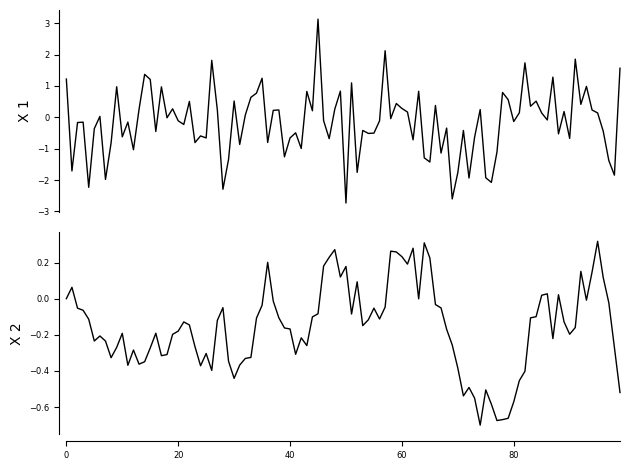

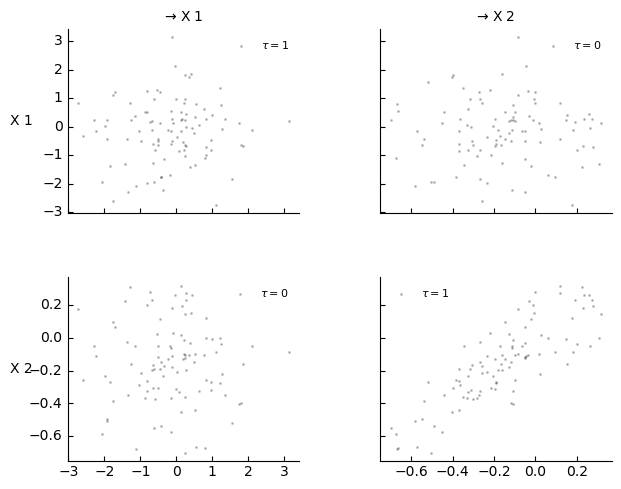

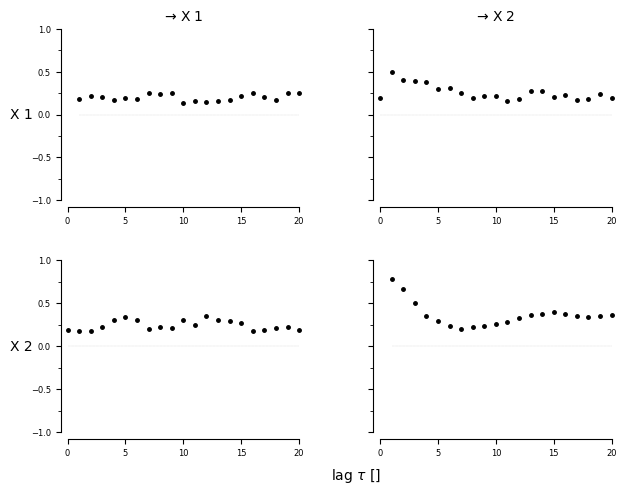

In [6]:
# Imports
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline     
## use `%matplotlib notebook` for interactive figures
# plt.style.use('ggplot')
import sklearn

import tigramite
from tigramite import data_processing as pp
from tigramite.toymodels import structural_causal_processes as toys

from tigramite import plotting as tp
from tigramite.pcmci import PCMCI
from tigramite.lpcmci import LPCMCI

from tigramite.independence_tests.parcorr import ParCorr
from tigramite.independence_tests.robust_parcorr import RobustParCorr
from tigramite.independence_tests.parcorr_wls import ParCorrWLS 
from tigramite.independence_tests.gpdc import GPDC
from tigramite.independence_tests.cmiknn import CMIknn
from tigramite.independence_tests.cmisymb import CMIsymb
from tigramite.independence_tests.gsquared import Gsquared
from tigramite.independence_tests.regressionCI import RegressionCI


var_names = [r'X 1', r'X 2']
dataframe = pp.DataFrame(data, 
                         datatime = {0:np.arange(len(data))}, 
                         var_names=var_names)


tp.plot_timeseries(dataframe); plt.show()

# parcorr = ParCorr(significance='analytic')
# pcmci = PCMCI(
#     dataframe=dataframe, 
#     cond_ind_test=parcorr,
#     verbosity=1)

gpdc_test = gpdc.GPDC(significance='analytic', gp_params=None)
pcmci = PCMCI(
    dataframe=dataframe, 
    cond_ind_test=gpdc_test,
    verbosity=0)


matrix_lags = None #np.argmax(np.abs(correlations), axis=2)
tp.plot_scatterplots(dataframe=dataframe, add_scatterplot_args={'matrix_lags':matrix_lags}); plt.show()
correlations = pcmci.get_lagged_dependencies(tau_max=20, val_only=True)['val_matrix']
lag_func_matrix = tp.plot_lagfuncs(val_matrix=correlations, setup_args={'var_names':var_names, 
                                    'x_base':5, 'y_base':.5}); plt.show()


##
## Step 1: PC1 algorithm for selecting lagged conditions
##

Parameters:
independence test = gp_dc
tau_min = 1
tau_max = 2
pc_alpha = [0.05, 0.1, 0.2, 0.3, 0.4, 0.5]
max_conds_dim = None
max_combinations = 1



## Resulting lagged parent (super)sets:

    Variable X 1 has 1 link(s):
    [pc_alpha = 0.3]
        (X 2 -2): max_pval = 0.24800, |min_val| =  0.179

    Variable X 2 has 2 link(s):
    [pc_alpha = 0.05]
        (X 2 -1): max_pval = 0.00000, |min_val| =  0.573
        (X 1 -1): max_pval = 0.00000, |min_val| =  0.420

##
## Step 2: MCI algorithm
##

Parameters:

independence test = gp_dc
tau_min = 1
tau_max = 2
max_conds_py = None
max_conds_px = None

## Significant links at alpha = 0.01:

    Variable X 1 has 1 link(s):
        (X 2 -1): pval = 0.00800 | val =  0.290

    Variable X 2 has 2 link(s):
        (X 1 -1): pval = 0.00000 | val =  0.652
        (X 2 -1): pval = 0.00000 | val =  0.551


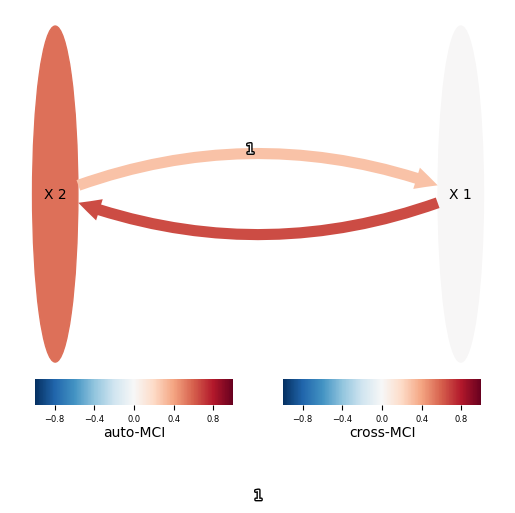

In [10]:

pcmci.verbosity = 1
tau_min=1
tau_max=2
results = pcmci.run_pcmci(tau_max=tau_max, tau_min=tau_min, pc_alpha=None, alpha_level=0.01)

tp.plot_graph(
    val_matrix=results['val_matrix'],
    graph=results['graph'],
    var_names=var_names,
    link_colorbar_label='cross-MCI',
    node_colorbar_label='auto-MCI',
    show_autodependency_lags=False
    ); plt.show()


##
## Step 1: PC1 algorithm for selecting lagged conditions
##

Parameters:
independence test = gp_dc
tau_min = 1
tau_max = 2
pc_alpha = [0.05, 0.1, 0.2, 0.3, 0.4, 0.5]
max_conds_dim = None
max_combinations = 1



## Resulting lagged parent (super)sets:

    Variable X 1 has 1 link(s):
    [pc_alpha = 0.3]
        (X 2 -2): max_pval = 0.24800, |min_val| =  0.179

    Variable X 2 has 2 link(s):
    [pc_alpha = 0.05]
        (X 2 -1): max_pval = 0.00000, |min_val| =  0.573
        (X 1 -1): max_pval = 0.00000, |min_val| =  0.420

##
## Step 2: MCI algorithm
##

Parameters:

independence test = gp_dc
tau_min = 1
tau_max = 2
max_conds_py = None
max_conds_px = None

## Significant links at alpha = 0.01:

    Variable X 1 has 1 link(s):
        (X 2 -1): pval = 0.00800 | val =  0.290

    Variable X 2 has 2 link(s):
        (X 1 -1): pval = 0.00000 | val =  0.652
        (X 2 -1): pval = 0.00000 | val =  0.551
    Variable X 1 has 1 link(s):
        (X 2 -1): pval = 0.00800 | val =  0.290


d:\Users\User\anaconda3\envs\pz_venv_causal\lib\site-packages\sklearn\gaussian_process\kernels.py:419: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
d:\Users\User\anaconda3\envs\pz_venv_causal\lib\site-packages\sklearn\gaussian_process\kernels.py:419: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
d:\Users\User\anaconda3\envs\pz_venv_causal\lib\site-packages\sklearn\gaussian_process\kernels.py:419: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
d:\Users\User\anaconda3\envs\pz_


## Significant links at alpha = 0.01:

    Variable X 1 has 1 link(s):
        (X 2 -1): pval = 0.00000 | val =  0.332

    Variable X 2 has 3 link(s):
        (X 1 -1): pval = 0.00000 | val =  0.636
        (X 2 -1): pval = 0.00000 | val =  0.537
        (X 1 -2): pval = 0.00000 | val =  0.373
    Variable X 1 has 1 link(s):
        (X 2 -1): pval = 0.00000 | val =  0.332
    Variable X 2 has 3 link(s):
        (X 1 -1): pval = 0.00000 | val =  0.636
        (X 2 -1): pval = 0.00000 | val =  0.537
        (X 1 -2): pval = 0.00000 | val =  0.373
''
'## Significant links at alpha = 0.05:'
'    Variable X 1 has 1 link(s):'
target var: X 1
'        (X 2 -1): pval = 0.00000 | val =  0.332'
Cause match found: <re.Match object; span=(8, 16), match='(X 2 -1)'>
Val match found: <re.Match object; span=(33, 47), match='| val =  0.332'>
['X', '2', '-1']
Cause name: X 2
Cause index: 1
'    Variable X 2 has 3 link(s):'
target var: X 2
'        (X 1 -1): pval = 0.00000 | val =  0.636'
Cause match f

d:\Users\User\anaconda3\envs\pz_venv_causal\lib\site-packages\sklearn\gaussian_process\kernels.py:419: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
d:\Users\User\anaconda3\envs\pz_venv_causal\lib\site-packages\sklearn\gaussian_process\kernels.py:419: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
d:\Users\User\anaconda3\envs\pz_venv_causal\lib\site-packages\sklearn\gaussian_process\kernels.py:419: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
d:\Users\User\anaconda3\envs\pz_v


## Significant links at alpha = 0.01:

    Variable X 1 has 1 link(s):
        (X 2 -1): pval = 0.01000 | val =  0.309

    Variable X 2 has 3 link(s):
        (X 1 -1): pval = 0.00000 | val =  0.629
        (X 2 -1): pval = 0.00000 | val =  0.530
        (X 1 -2): pval = 0.00600 | val =  0.326
    Variable X 1 has 1 link(s):
        (X 2 -1): pval = 0.01000 | val =  0.309
    Variable X 2 has 3 link(s):
        (X 1 -1): pval = 0.00000 | val =  0.629
        (X 2 -1): pval = 0.00000 | val =  0.530
        (X 1 -2): pval = 0.00600 | val =  0.326
''
'## Significant links at alpha = 0.05:'
'    Variable X 1 has 1 link(s):'
target var: X 1
'        (X 2 -1): pval = 0.01000 | val =  0.309'
Cause match found: <re.Match object; span=(8, 16), match='(X 2 -1)'>
Val match found: <re.Match object; span=(33, 47), match='| val =  0.309'>
['X', '2', '-1']
Cause name: X 2
Cause index: 1
'    Variable X 2 has 3 link(s):'
target var: X 2
'        (X 1 -1): pval = 0.00000 | val =  0.629'
Cause match f

d:\Users\User\anaconda3\envs\pz_venv_causal\lib\site-packages\sklearn\gaussian_process\kernels.py:419: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
d:\Users\User\anaconda3\envs\pz_venv_causal\lib\site-packages\sklearn\gaussian_process\kernels.py:419: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
d:\Users\User\anaconda3\envs\pz_venv_causal\lib\site-packages\sklearn\gaussian_process\kernels.py:419: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(



## Resulting lagged parent (super)sets:

    Variable X 1 has 2 link(s):
    [pc_alpha = 0.05]
        (X 2 -4): max_pval = 0.03800, |min_val| =  0.275
        (X 1 -8): max_pval = 0.04800, |min_val| =  0.257

    Variable X 2 has 2 link(s):
    [pc_alpha = 0.05]
        (X 2 -1): max_pval = 0.00000, |min_val| =  0.576
        (X 1 -1): max_pval = 0.00000, |min_val| =  0.430

##
## Step 2: MCI algorithm
##

Parameters:

independence test = gp_dc
tau_min = 1
tau_max = 8
max_conds_py = None
max_conds_px = None


d:\Users\User\anaconda3\envs\pz_venv_causal\lib\site-packages\sklearn\gaussian_process\kernels.py:419: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
d:\Users\User\anaconda3\envs\pz_venv_causal\lib\site-packages\sklearn\gaussian_process\kernels.py:419: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
d:\Users\User\anaconda3\envs\pz_venv_causal\lib\site-packages\sklearn\gaussian_process\kernels.py:419: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
d:\Users\User\anaconda3\envs\pz


## Significant links at alpha = 0.01:

    Variable X 1 has 1 link(s):
        (X 2 -1): pval = 0.00200 | val =  0.375

    Variable X 2 has 3 link(s):
        (X 1 -1): pval = 0.00000 | val =  0.632
        (X 2 -1): pval = 0.00000 | val =  0.532
        (X 1 -2): pval = 0.00200 | val =  0.366
    Variable X 1 has 2 link(s):
        (X 2 -1): pval = 0.00200 | val =  0.375
        (X 1 -8): pval = 0.04800 | val =  0.256
    Variable X 2 has 3 link(s):
        (X 1 -1): pval = 0.00000 | val =  0.632
        (X 2 -1): pval = 0.00000 | val =  0.532
        (X 1 -2): pval = 0.00200 | val =  0.366
''
'## Significant links at alpha = 0.05:'
'    Variable X 1 has 2 link(s):'
target var: X 1
'        (X 2 -1): pval = 0.00200 | val =  0.375'
Cause match found: <re.Match object; span=(8, 16), match='(X 2 -1)'>
Val match found: <re.Match object; span=(33, 47), match='| val =  0.375'>
['X', '2', '-1']
Cause name: X 2
Cause index: 1
'        (X 1 -8): pval = 0.04800 | val =  0.256'
Cause match fou

d:\Users\User\anaconda3\envs\pz_venv_causal\lib\site-packages\sklearn\gaussian_process\kernels.py:419: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
d:\Users\User\anaconda3\envs\pz_venv_causal\lib\site-packages\sklearn\gaussian_process\kernels.py:419: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
d:\Users\User\anaconda3\envs\pz_venv_causal\lib\site-packages\sklearn\gaussian_process\kernels.py:419: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
d:\Users\User\anaconda3\envs\pz_ve


## Significant links at alpha = 0.01:

    Variable X 1 has 1 link(s):
        (X 2 -1): pval = 0.00200 | val =  0.350

    Variable X 2 has 3 link(s):
        (X 1 -1): pval = 0.00000 | val =  0.634
        (X 2 -1): pval = 0.00000 | val =  0.510
        (X 1 -2): pval = 0.00000 | val =  0.370
    Variable X 1 has 1 link(s):
        (X 2 -1): pval = 0.00200 | val =  0.350
    Variable X 2 has 3 link(s):
        (X 1 -1): pval = 0.00000 | val =  0.634
        (X 2 -1): pval = 0.00000 | val =  0.510
        (X 1 -2): pval = 0.00000 | val =  0.370
''
'## Significant links at alpha = 0.05:'
'    Variable X 1 has 1 link(s):'
target var: X 1
'        (X 2 -1): pval = 0.00200 | val =  0.350'
Cause match found: <re.Match object; span=(8, 16), match='(X 2 -1)'>
Val match found: <re.Match object; span=(33, 47), match='| val =  0.350'>
['X', '2', '-1']
Cause name: X 2
Cause index: 1
'    Variable X 2 has 3 link(s):'
target var: X 2
'        (X 1 -1): pval = 0.00000 | val =  0.634'
Cause match f

d:\Users\User\anaconda3\envs\pz_venv_causal\lib\site-packages\sklearn\gaussian_process\kernels.py:419: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(



## Resulting lagged parent (super)sets:

    Variable X 1 has 4 link(s):
    [pc_alpha = 0.3]
        (X 2 -4): max_pval = 0.05400, |min_val| =  0.250
        (X 1 -8): max_pval = 0.07600, |min_val| =  0.244
        (X 1 -9): max_pval = 0.10800, |min_val| =  0.225
        (X 1 -3): max_pval = 0.29000, |min_val| =  0.183

    Variable X 2 has 2 link(s):
    [pc_alpha = 0.05]
        (X 2 -1): max_pval = 0.00000, |min_val| =  0.577
        (X 1 -1): max_pval = 0.00000, |min_val| =  0.465

##
## Step 2: MCI algorithm
##

Parameters:

independence test = gp_dc
tau_min = 1
tau_max = 10
max_conds_py = None
max_conds_px = None


d:\Users\User\anaconda3\envs\pz_venv_causal\lib\site-packages\sklearn\gaussian_process\kernels.py:419: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
d:\Users\User\anaconda3\envs\pz_venv_causal\lib\site-packages\sklearn\gaussian_process\kernels.py:419: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
d:\Users\User\anaconda3\envs\pz_venv_causal\lib\site-packages\sklearn\gaussian_process\kernels.py:419: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
d:\Users\User\anaconda3\envs\pz_ve


## Significant links at alpha = 0.01:

    Variable X 1 has 1 link(s):
        (X 2 -1): pval = 0.00000 | val =  0.367

    Variable X 2 has 3 link(s):
        (X 1 -1): pval = 0.00000 | val =  0.656
        (X 2 -1): pval = 0.00000 | val =  0.485
        (X 1 -2): pval = 0.00200 | val =  0.355
    Variable X 1 has 2 link(s):
        (X 2 -1): pval = 0.00000 | val =  0.367
        (X 1 -9): pval = 0.04000 | val =  0.257
    Variable X 2 has 3 link(s):
        (X 1 -1): pval = 0.00000 | val =  0.656
        (X 2 -1): pval = 0.00000 | val =  0.485
        (X 1 -2): pval = 0.00200 | val =  0.355
''
'## Significant links at alpha = 0.05:'
'    Variable X 1 has 2 link(s):'
target var: X 1
'        (X 2 -1): pval = 0.00000 | val =  0.367'
Cause match found: <re.Match object; span=(8, 16), match='(X 2 -1)'>
Val match found: <re.Match object; span=(33, 47), match='| val =  0.367'>
['X', '2', '-1']
Cause name: X 2
Cause index: 1
'        (X 1 -9): pval = 0.04000 | val =  0.257'
Cause match fou

d:\Users\User\anaconda3\envs\pz_venv_causal\lib\site-packages\sklearn\gaussian_process\kernels.py:419: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


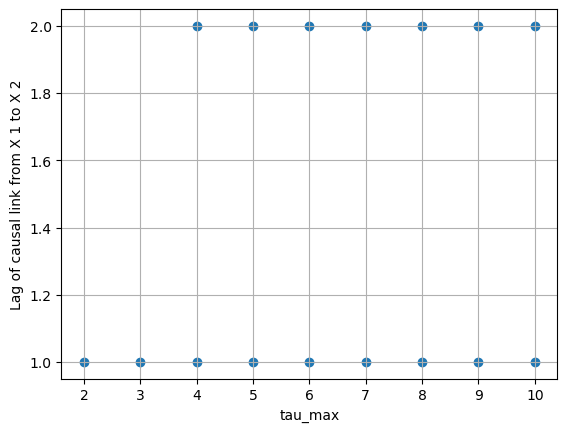

In [11]:
import matplotlib.pyplot as plt
from toolbox import post_processing_functions as ppf
import importlib
importlib.reload(ppf)

tau_min=1
# Lists to store tau_max values and corresponding lags
tau_max_values = []
lag_values = []

# Loop over tau_max from 2 to 10
for tau_max in range(2, 11):
    # Run PCMCI with the current tau_max
    results = pcmci.run_pcmci(tau_max=tau_max, tau_min=tau_min, pc_alpha=None, alpha_level=0.01)
    
    # Extract causal links
    N = results['p_matrix'].shape[0]
    results_text = ppf.print_significant_links(
        N, var_names, p_matrix=results['p_matrix'],
        val_matrix=results['val_matrix'], alpha_level=0.05
    )
    causal_links = ppf.parse_results_to_dict(results_text, var_names)
    
    # Check for causal links from 'X 1' to 'X 2'
    if 'X 2' in causal_links:
        for link in causal_links['X 2']:
            if link['cause'] == 'X 1':
                # Store the tau_max and corresponding lag
                tau_max_values.append(tau_max)
                lag_values.append(-link['lag'])  # Use negative lag for plotting
                
# Create the scatter plot
plt.scatter(tau_max_values, lag_values)
plt.xlabel('tau_max')
plt.ylabel('Lag of causal link from X 1 to X 2')
# plt.title('Causal Link Lags from X 1 to X 2 vs tau_max')
plt.xticks(range(2, 11))
plt.grid(True)
plt.show()


1. $X_t^0 = 0.4(X_{t-1}^1)^2 + \eta_t^0$
2. $X_t^1 = \eta_t^1$
3. $X_t^2 = 0.3(X_{t-2}^1)^2 + \eta_t^2$


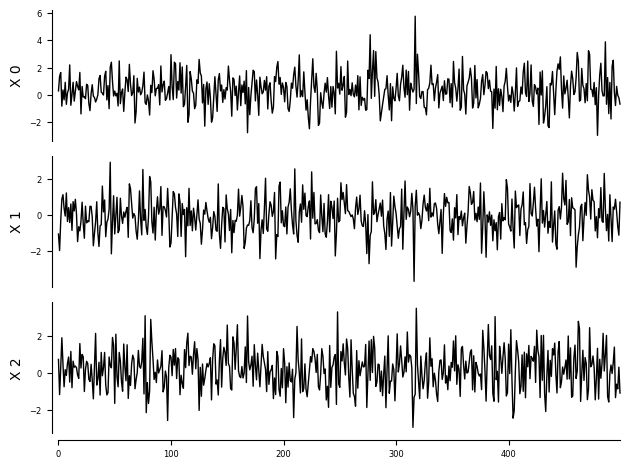

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tigramite
from tigramite import data_processing as pp
from tigramite import plotting as tp
from tigramite.pcmci import PCMCI
from tigramite.independence_tests import parcorr, gpdc, cmiknn
import pandas as pd

random_state = np.random.default_rng(seed=42)
data = random_state.standard_normal((500, 3))
for t in range(1, 500):
    data[t, 0] += 0.4*data[t-1, 1]**2
    data[t, 2] += 0.3*data[t-2, 1]**2
var_names = ['X 0', 'X 1', 'X 2']

dataframe = pp.DataFrame(data, var_names=var_names)
tp.plot_timeseries(dataframe); plt.show()

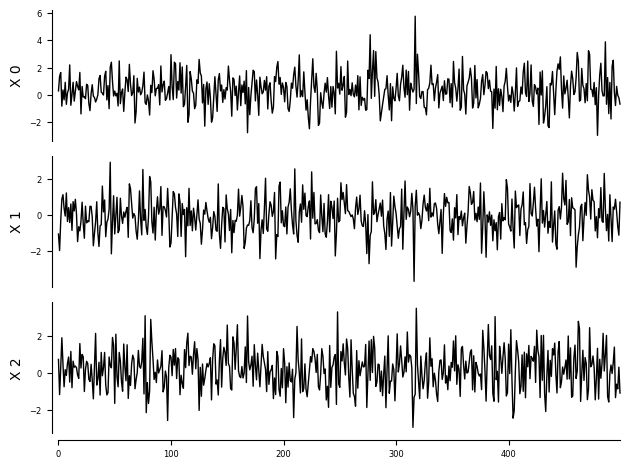

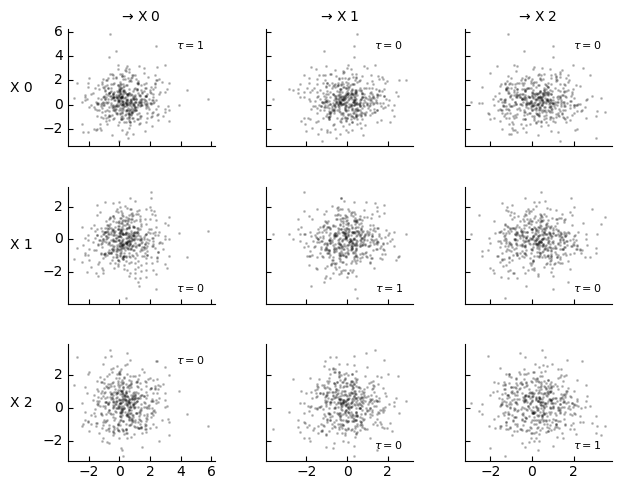

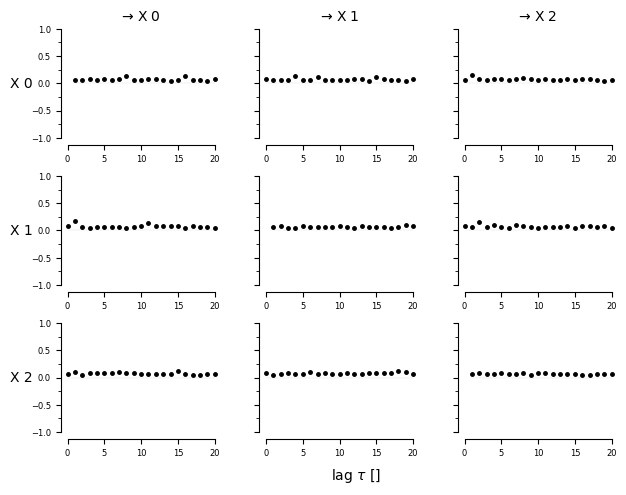

In [2]:
# Imports
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline     
## use `%matplotlib notebook` for interactive figures
# plt.style.use('ggplot')
import sklearn

import tigramite
from tigramite import data_processing as pp
from tigramite.toymodels import structural_causal_processes as toys

from tigramite import plotting as tp
from tigramite.pcmci import PCMCI
from tigramite.lpcmci import LPCMCI

from tigramite.independence_tests.parcorr import ParCorr
from tigramite.independence_tests.robust_parcorr import RobustParCorr
from tigramite.independence_tests.parcorr_wls import ParCorrWLS 
from tigramite.independence_tests.gpdc import GPDC
from tigramite.independence_tests.cmiknn import CMIknn
from tigramite.independence_tests.cmisymb import CMIsymb
from tigramite.independence_tests.gsquared import Gsquared
from tigramite.independence_tests.regressionCI import RegressionCI



# dataframe = pp.DataFrame(data, 
#                          datatime = {0:np.arange(len(data))}, 
#                          var_names=var_names)


tp.plot_timeseries(dataframe); plt.show()

# parcorr = ParCorr(significance='analytic')
# pcmci = PCMCI(
#     dataframe=dataframe, 
#     cond_ind_test=parcorr,
#     verbosity=1)

gpdc_test = gpdc.GPDC(significance='analytic', gp_params=None)
pcmci = PCMCI(
    dataframe=dataframe, 
    cond_ind_test=gpdc_test,
    verbosity=0)


matrix_lags = None #np.argmax(np.abs(correlations), axis=2)
tp.plot_scatterplots(dataframe=dataframe, add_scatterplot_args={'matrix_lags':matrix_lags}); plt.show()
correlations = pcmci.get_lagged_dependencies(tau_max=20, val_only=True)['val_matrix']
lag_func_matrix = tp.plot_lagfuncs(val_matrix=correlations, setup_args={'var_names':var_names, 
                                    'x_base':5, 'y_base':.5}); plt.show()


##
## Step 1: PC1 algorithm for selecting lagged conditions
##

Parameters:
independence test = gp_dc
tau_min = 1
tau_max = 3
pc_alpha = [0.05, 0.1, 0.2, 0.3, 0.4, 0.5]
max_conds_dim = None
max_combinations = 1



## Resulting lagged parent (super)sets:

    Variable X 0 has 1 link(s):
    [pc_alpha = 0.05]
        (X 1 -1): max_pval = 0.00000, |min_val| =  0.157

    Variable X 1 has 1 link(s):
    [pc_alpha = 0.2]
        (X 0 -3): max_pval = 0.19000, |min_val| =  0.081

    Variable X 2 has 1 link(s):
    [pc_alpha = 0.05]
        (X 1 -2): max_pval = 0.00000, |min_val| =  0.141

##
## Step 2: MCI algorithm
##

Parameters:

independence test = gp_dc
tau_min = 1
tau_max = 3
max_conds_py = None
max_conds_px = None


d:\Users\User\anaconda3\envs\pz_venv_causal\lib\site-packages\sklearn\gaussian_process\kernels.py:429: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__length_scale is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
d:\Users\User\anaconda3\envs\pz_venv_causal\lib\site-packages\sklearn\gaussian_process\kernels.py:429: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__length_scale is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(



## Significant links at alpha = 0.01:

    Variable X 0 has 1 link(s):
        (X 1 -1): pval = 0.00000 | val =  0.158

    Variable X 1 has 0 link(s):

    Variable X 2 has 1 link(s):
        (X 1 -2): pval = 0.00000 | val =  0.157


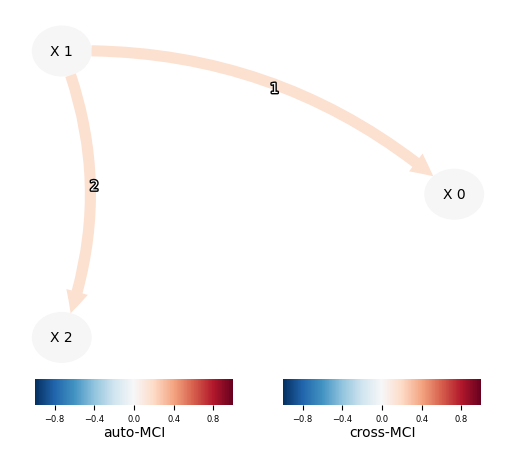

In [3]:

pcmci.verbosity = 1
tau_min=1
tau_max=3
results = pcmci.run_pcmci(tau_max=tau_max, tau_min=tau_min, pc_alpha=None, alpha_level=0.01)

tp.plot_graph(
    val_matrix=results['val_matrix'],
    graph=results['graph'],
    var_names=var_names,
    link_colorbar_label='cross-MCI',
    node_colorbar_label='auto-MCI',
    show_autodependency_lags=False
    ); plt.show()


##
## Step 1: PC1 algorithm for selecting lagged conditions
##

Parameters:
independence test = gp_dc
tau_min = 1
tau_max = 2
pc_alpha = [0.05, 0.1, 0.2, 0.3, 0.4, 0.5]
max_conds_dim = None
max_combinations = 1



## Resulting lagged parent (super)sets:

    Variable X 0 has 1 link(s):
    [pc_alpha = 0.05]
        (X 1 -1): max_pval = 0.00200, |min_val| =  0.156

    Variable X 1 has 3 link(s):
    [pc_alpha = 0.5]
        (X 0 -1): max_pval = 0.35200, |min_val| =  0.072
        (X 1 -1): max_pval = 0.35400, |min_val| =  0.072
        (X 2 -2): max_pval = 0.48600, |min_val| =  0.066

    Variable X 2 has 1 link(s):
    [pc_alpha = 0.05]
        (X 1 -2): max_pval = 0.00200, |min_val| =  0.141

##
## Step 2: MCI algorithm
##

Parameters:

independence test = gp_dc
tau_min = 1
tau_max = 2
max_conds_py = None
max_conds_px = None

## Significant links at alpha = 0.01:

    Variable X 0 has 1 link(s):
        (X 1 -1): pval = 0.00200 | val =  0.156

    Variable X 1 has 0 link(s):

    Va

d:\Users\User\anaconda3\envs\pz_venv_causal\lib\site-packages\sklearn\gaussian_process\kernels.py:429: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__length_scale is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
d:\Users\User\anaconda3\envs\pz_venv_causal\lib\site-packages\sklearn\gaussian_process\kernels.py:429: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__length_scale is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
d:\Users\User\anaconda3\envs\pz_venv_causal\lib\site-packages\sklearn\gaussian_process\kernels.py:429: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__length_scale is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
d:\Users\User\anaconda


## Significant links at alpha = 0.01:

    Variable X 0 has 1 link(s):
        (X 1 -1): pval = 0.00000 | val =  0.157

    Variable X 1 has 0 link(s):

    Variable X 2 has 1 link(s):
        (X 1 -2): pval = 0.00000 | val =  0.151
    Variable X 0 has 2 link(s):
        (X 1 -1): pval = 0.00000 | val =  0.157
        (X 2 -1): pval = 0.03400 | val =  0.107
    Variable X 1 has 1 link(s):
        (X 0 -4): pval = 0.01600 | val =  0.118
    Variable X 2 has 2 link(s):
        (X 1 -2): pval = 0.00000 | val =  0.151
        (X 0 -2): pval = 0.01200 | val =  0.123
''
'## Significant links at alpha = 0.05:'
'    Variable X 0 has 2 link(s):'
target var: X 0
'        (X 1 -1): pval = 0.00000 | val =  0.157'
Cause match found: <re.Match object; span=(8, 16), match='(X 1 -1)'>
Val match found: <re.Match object; span=(33, 47), match='| val =  0.157'>
['X', '1', '-1']
Cause name: X 1
Cause index: 1
'        (X 2 -1): pval = 0.03400 | val =  0.107'
Cause match found: <re.Match object; span=(8, 

d:\Users\User\anaconda3\envs\pz_venv_causal\lib\site-packages\sklearn\gaussian_process\kernels.py:429: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__length_scale is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(



## Resulting lagged parent (super)sets:

    Variable X 0 has 2 link(s):
    [pc_alpha = 0.05]
        (X 1 -1): max_pval = 0.00600, |min_val| =  0.158
        (X 2 -1): max_pval = 0.04800, |min_val| =  0.104

    Variable X 1 has 7 link(s):
    [pc_alpha = 0.5]
        (X 0 -4): max_pval = 0.03200, |min_val| =  0.111
        (X 0 -3): max_pval = 0.23000, |min_val| =  0.079
        (X 1 -5): max_pval = 0.29200, |min_val| =  0.075
        (X 0 -1): max_pval = 0.35200, |min_val| =  0.073
        (X 1 -1): max_pval = 0.40200, |min_val| =  0.070
        (X 1 -2): max_pval = 0.40600, |min_val| =  0.070
        (X 2 -5): max_pval = 0.49800, |min_val| =  0.066

    Variable X 2 has 1 link(s):
    [pc_alpha = 0.05]
        (X 1 -2): max_pval = 0.00800, |min_val| =  0.141

##
## Step 2: MCI algorithm
##

Parameters:

independence test = gp_dc
tau_min = 1
tau_max = 5
max_conds_py = None
max_conds_px = None


d:\Users\User\anaconda3\envs\pz_venv_causal\lib\site-packages\sklearn\gaussian_process\kernels.py:419: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
d:\Users\User\anaconda3\envs\pz_venv_causal\lib\site-packages\sklearn\gaussian_process\kernels.py:419: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
d:\Users\User\anaconda3\envs\pz_venv_causal\lib\site-packages\sklearn\gaussian_process\kernels.py:419: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
d:\Users\User\anaconda3\envs\pz_ve


## Significant links at alpha = 0.01:

    Variable X 0 has 1 link(s):
        (X 1 -1): pval = 0.00600 | val =  0.158

    Variable X 1 has 0 link(s):

    Variable X 2 has 1 link(s):
        (X 1 -2): pval = 0.00600 | val =  0.157
    Variable X 0 has 2 link(s):
        (X 1 -1): pval = 0.00600 | val =  0.158
        (X 2 -1): pval = 0.04200 | val =  0.106
    Variable X 1 has 1 link(s):
        (X 0 -4): pval = 0.01200 | val =  0.117
    Variable X 2 has 2 link(s):
        (X 1 -2): pval = 0.00600 | val =  0.157
        (X 0 -2): pval = 0.01200 | val =  0.124
''
'## Significant links at alpha = 0.05:'
'    Variable X 0 has 2 link(s):'
target var: X 0
'        (X 1 -1): pval = 0.00600 | val =  0.158'
Cause match found: <re.Match object; span=(8, 16), match='(X 1 -1)'>
Val match found: <re.Match object; span=(33, 47), match='| val =  0.158'>
['X', '1', '-1']
Cause name: X 1
Cause index: 1
'        (X 2 -1): pval = 0.04200 | val =  0.106'
Cause match found: <re.Match object; span=(8, 

d:\Users\User\anaconda3\envs\pz_venv_causal\lib\site-packages\sklearn\gaussian_process\kernels.py:419: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(



## Resulting lagged parent (super)sets:

    Variable X 0 has 1 link(s):
    [pc_alpha = 0.05]
        (X 1 -1): max_pval = 0.00000, |min_val| =  0.158

    Variable X 1 has 7 link(s):
    [pc_alpha = 0.4]
        (X 0 -4): max_pval = 0.01400, |min_val| =  0.122
        (X 2 -6): max_pval = 0.07200, |min_val| =  0.101
        (X 0 -3): max_pval = 0.25200, |min_val| =  0.078
        (X 0 -1): max_pval = 0.31600, |min_val| =  0.075
        (X 1 -5): max_pval = 0.32000, |min_val| =  0.075
        (X 1 -1): max_pval = 0.35400, |min_val| =  0.073
        (X 1 -2): max_pval = 0.39600, |min_val| =  0.071

    Variable X 2 has 1 link(s):
    [pc_alpha = 0.05]
        (X 1 -2): max_pval = 0.00200, |min_val| =  0.143

##
## Step 2: MCI algorithm
##

Parameters:

independence test = gp_dc
tau_min = 1
tau_max = 6
max_conds_py = None
max_conds_px = None


d:\Users\User\anaconda3\envs\pz_venv_causal\lib\site-packages\sklearn\gaussian_process\kernels.py:419: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
d:\Users\User\anaconda3\envs\pz_venv_causal\lib\site-packages\sklearn\gaussian_process\kernels.py:419: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
d:\Users\User\anaconda3\envs\pz_venv_causal\lib\site-packages\sklearn\gaussian_process\kernels.py:419: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
d:\Users\User\anaconda3\envs\pz_ve


## Significant links at alpha = 0.01:

    Variable X 0 has 1 link(s):
        (X 1 -1): pval = 0.00000 | val =  0.158

    Variable X 1 has 1 link(s):
        (X 0 -4): pval = 0.01000 | val =  0.129

    Variable X 2 has 1 link(s):
        (X 1 -2): pval = 0.00000 | val =  0.159
    Variable X 0 has 1 link(s):
        (X 1 -1): pval = 0.00000 | val =  0.158
    Variable X 1 has 2 link(s):
        (X 0 -4): pval = 0.01000 | val =  0.129
        (X 2 -6): pval = 0.03800 | val =  0.109
    Variable X 2 has 2 link(s):
        (X 1 -2): pval = 0.00000 | val =  0.159
        (X 0 -2): pval = 0.02800 | val =  0.113
''
'## Significant links at alpha = 0.05:'
'    Variable X 0 has 1 link(s):'
target var: X 0
'        (X 1 -1): pval = 0.00000 | val =  0.158'
Cause match found: <re.Match object; span=(8, 16), match='(X 1 -1)'>
Val match found: <re.Match object; span=(33, 47), match='| val =  0.158'>
['X', '1', '-1']
Cause name: X 1
Cause index: 1
'    Variable X 1 has 2 link(s):'
target var: X 

d:\Users\User\anaconda3\envs\pz_venv_causal\lib\site-packages\sklearn\gaussian_process\kernels.py:429: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__length_scale is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
d:\Users\User\anaconda3\envs\pz_venv_causal\lib\site-packages\sklearn\gaussian_process\kernels.py:419: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
d:\Users\User\anaconda3\envs\pz_venv_causal\lib\site-packages\sklearn\gaussian_process\kernels.py:429: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__length_scale is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
d:\Users\User\anaconda3\e


## Resulting lagged parent (super)sets:

    Variable X 0 has 1 link(s):
    [pc_alpha = 0.05]
        (X 1 -1): max_pval = 0.00000, |min_val| =  0.158

    Variable X 1 has 10 link(s):
    [pc_alpha = 0.5]
        (X 0 -4): max_pval = 0.00800, |min_val| =  0.124
        (X 0 -7): max_pval = 0.04800, |min_val| =  0.104
        (X 2 -6): max_pval = 0.08400, |min_val| =  0.095
        (X 1 -1): max_pval = 0.29000, |min_val| =  0.077
        (X 0 -3): max_pval = 0.29600, |min_val| =  0.077
        (X 0 -1): max_pval = 0.30800, |min_val| =  0.075
        (X 1 -2): max_pval = 0.35600, |min_val| =  0.073
        (X 1 -5): max_pval = 0.36200, |min_val| =  0.073
        (X 2 -5): max_pval = 0.42400, |min_val| =  0.070
        (X 2 -2): max_pval = 0.49800, |min_val| =  0.066

    Variable X 2 has 2 link(s):
    [pc_alpha = 0.05]
        (X 1 -2): max_pval = 0.00000, |min_val| =  0.145
        (X 1 -7): max_pval = 0.04800, |min_val| =  0.104

##
## Step 2: MCI algorithm
##

Parameters:

indepen

d:\Users\User\anaconda3\envs\pz_venv_causal\lib\site-packages\sklearn\gaussian_process\kernels.py:419: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
d:\Users\User\anaconda3\envs\pz_venv_causal\lib\site-packages\sklearn\gaussian_process\kernels.py:419: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
d:\Users\User\anaconda3\envs\pz_venv_causal\lib\site-packages\sklearn\gaussian_process\kernels.py:419: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
d:\Users\User\anaconda3\envs\pz_ve


## Significant links at alpha = 0.01:

    Variable X 0 has 1 link(s):
        (X 1 -1): pval = 0.00000 | val =  0.159

    Variable X 1 has 2 link(s):
        (X 0 -4): pval = 0.00800 | val =  0.128
        (X 2 -6): pval = 0.01000 | val =  0.123

    Variable X 2 has 1 link(s):
        (X 1 -2): pval = 0.00000 | val =  0.160
    Variable X 0 has 4 link(s):
        (X 1 -1): pval = 0.00000 | val =  0.159
        (X 2 -1): pval = 0.02800 | val =  0.115
        (X 2 -7): pval = 0.03600 | val =  0.110
        (X 0 -7): pval = 0.04200 | val =  0.107
    Variable X 1 has 2 link(s):
        (X 0 -4): pval = 0.00800 | val =  0.128
        (X 2 -6): pval = 0.01000 | val =  0.123
    Variable X 2 has 2 link(s):
        (X 1 -2): pval = 0.00000 | val =  0.160
        (X 2 -5): pval = 0.02600 | val =  0.116
''
'## Significant links at alpha = 0.05:'
'    Variable X 0 has 4 link(s):'
target var: X 0
'        (X 1 -1): pval = 0.00000 | val =  0.159'
Cause match found: <re.Match object; span=(8, 1

d:\Users\User\anaconda3\envs\pz_venv_causal\lib\site-packages\sklearn\gaussian_process\kernels.py:419: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
d:\Users\User\anaconda3\envs\pz_venv_causal\lib\site-packages\sklearn\gaussian_process\kernels.py:419: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
d:\Users\User\anaconda3\envs\pz_venv_causal\lib\site-packages\sklearn\gaussian_process\kernels.py:419: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
d:\Users\User\anaconda3\envs\pz


## Resulting lagged parent (super)sets:

    Variable X 0 has 2 link(s):
    [pc_alpha = 0.05]
        (X 1 -1): max_pval = 0.00000, |min_val| =  0.155
        (X 2 -1): max_pval = 0.04800, |min_val| =  0.104

    Variable X 1 has 9 link(s):
    [pc_alpha = 0.4]
        (X 0 -4): max_pval = 0.00400, |min_val| =  0.125
        (X 0 -7): max_pval = 0.04000, |min_val| =  0.106
        (X 2 -6): max_pval = 0.08800, |min_val| =  0.094
        (X 0 -3): max_pval = 0.23600, |min_val| =  0.078
        (X 1 -1): max_pval = 0.26800, |min_val| =  0.075
        (X 1 -2): max_pval = 0.26800, |min_val| =  0.075
        (X 0 -1): max_pval = 0.30000, |min_val| =  0.073
        (X 1 -5): max_pval = 0.32200, |min_val| =  0.072
        (X 2 -2): max_pval = 0.39600, |min_val| =  0.068

    Variable X 2 has 2 link(s):
    [pc_alpha = 0.05]
        (X 1 -2): max_pval = 0.00200, |min_val| =  0.145
        (X 1 -7): max_pval = 0.04800, |min_val| =  0.105

##
## Step 2: MCI algorithm
##

Parameters:

independ

d:\Users\User\anaconda3\envs\pz_venv_causal\lib\site-packages\sklearn\gaussian_process\kernels.py:419: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
d:\Users\User\anaconda3\envs\pz_venv_causal\lib\site-packages\sklearn\gaussian_process\kernels.py:419: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
d:\Users\User\anaconda3\envs\pz_venv_causal\lib\site-packages\sklearn\gaussian_process\kernels.py:419: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
d:\Users\User\anaconda3\envs\pz_ve


## Significant links at alpha = 0.01:

    Variable X 0 has 1 link(s):
        (X 1 -1): pval = 0.00000 | val =  0.159

    Variable X 1 has 1 link(s):
        (X 0 -4): pval = 0.00400 | val =  0.127

    Variable X 2 has 1 link(s):
        (X 1 -2): pval = 0.00000 | val =  0.161
    Variable X 0 has 5 link(s):
        (X 1 -1): pval = 0.00000 | val =  0.159
        (X 2 -1): pval = 0.01800 | val =  0.117
        (X 2 -7): pval = 0.03400 | val =  0.109
        (X 2 -3): pval = 0.03600 | val =  0.107
        (X 0 -7): pval = 0.03600 | val =  0.107
    Variable X 1 has 3 link(s):
        (X 0 -4): pval = 0.00400 | val =  0.127
        (X 2 -6): pval = 0.02200 | val =  0.114
        (X 0 -3): pval = 0.04000 | val =  0.106
    Variable X 2 has 4 link(s):
        (X 1 -2): pval = 0.00000 | val =  0.161
        (X 0 -2): pval = 0.01600 | val =  0.118
        (X 2 -5): pval = 0.01800 | val =  0.116
        (X 1 -7): pval = 0.03600 | val =  0.107
''
'## Significant links at alpha = 0.05:'
'  

d:\Users\User\anaconda3\envs\pz_venv_causal\lib\site-packages\sklearn\gaussian_process\kernels.py:419: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
d:\Users\User\anaconda3\envs\pz_venv_causal\lib\site-packages\sklearn\gaussian_process\kernels.py:419: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
d:\Users\User\anaconda3\envs\pz_venv_causal\lib\site-packages\sklearn\gaussian_process\kernels.py:419: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
d:\Users\User\anaconda3\envs\pz_


## Resulting lagged parent (super)sets:

    Variable X 0 has 2 link(s):
    [pc_alpha = 0.05]
        (X 1 -1): max_pval = 0.00000, |min_val| =  0.156
        (X 2 -1): max_pval = 0.04800, |min_val| =  0.104

    Variable X 1 has 11 link(s):
    [pc_alpha = 0.5]
        (X 0 -4): max_pval = 0.01000, |min_val| =  0.129
        (X 0 -7): max_pval = 0.04000, |min_val| =  0.107
        (X 2 -6): max_pval = 0.07800, |min_val| =  0.097
        (X 0 -3): max_pval = 0.31600, |min_val| =  0.076
        (X 1 -1): max_pval = 0.31600, |min_val| =  0.076
        (X 1 -2): max_pval = 0.35400, |min_val| =  0.074
        (X 1 -5): max_pval = 0.38200, |min_val| =  0.072
        (X 0 -1): max_pval = 0.38600, |min_val| =  0.071
        (X 1 -9): max_pval = 0.45000, |min_val| =  0.068
        (X 2 -2): max_pval = 0.45800, |min_val| =  0.068
        (X 2 -5): max_pval = 0.46000, |min_val| =  0.068

    Variable X 2 has 2 link(s):
    [pc_alpha = 0.05]
        (X 1 -2): max_pval = 0.00400, |min_val| =  0.

d:\Users\User\anaconda3\envs\pz_venv_causal\lib\site-packages\sklearn\gaussian_process\kernels.py:419: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
d:\Users\User\anaconda3\envs\pz_venv_causal\lib\site-packages\sklearn\gaussian_process\kernels.py:419: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
d:\Users\User\anaconda3\envs\pz_venv_causal\lib\site-packages\sklearn\gaussian_process\kernels.py:419: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
d:\Users\User\anaconda3\envs\pz_ve


## Significant links at alpha = 0.01:

    Variable X 0 has 1 link(s):
        (X 1 -1): pval = 0.00000 | val =  0.160

    Variable X 1 has 1 link(s):
        (X 0 -4): pval = 0.01000 | val =  0.135

    Variable X 2 has 1 link(s):
        (X 1 -2): pval = 0.00000 | val =  0.158
    Variable X 0 has 5 link(s):
        (X 1 -1): pval = 0.00000 | val =  0.160
        (X 2 -1): pval = 0.03000 | val =  0.114
        (X 0 -7): pval = 0.03800 | val =  0.110
        (X 2 -7): pval = 0.04000 | val =  0.109
        (X 2 -3): pval = 0.04200 | val =  0.106
    Variable X 1 has 3 link(s):
        (X 0 -4): pval = 0.01000 | val =  0.135
        (X 2 -6): pval = 0.01600 | val =  0.123
        (X 0 -7): pval = 0.04800 | val =  0.104
    Variable X 2 has 3 link(s):
        (X 1 -2): pval = 0.00000 | val =  0.158
        (X 2 -5): pval = 0.02200 | val =  0.120
        (X 0 -2): pval = 0.02200 | val =  0.117
''
'## Significant links at alpha = 0.05:'
'    Variable X 0 has 5 link(s):'
target var: X 0
'

d:\Users\User\anaconda3\envs\pz_venv_causal\lib\site-packages\sklearn\gaussian_process\kernels.py:419: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
d:\Users\User\anaconda3\envs\pz_venv_causal\lib\site-packages\sklearn\gaussian_process\kernels.py:419: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
d:\Users\User\anaconda3\envs\pz_venv_causal\lib\site-packages\sklearn\gaussian_process\kernels.py:419: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
d:\Users\User\anaconda3\envs\pz


## Resulting lagged parent (super)sets:

    Variable X 0 has 2 link(s):
    [pc_alpha = 0.05]
        (X 1 -1): max_pval = 0.00200, |min_val| =  0.156
        (X 2 -1): max_pval = 0.03000, |min_val| =  0.106

    Variable X 1 has 11 link(s):
    [pc_alpha = 0.5]
        (X 0 -4): max_pval = 0.00400, |min_val| =  0.134
        (X 0 -7): max_pval = 0.02000, |min_val| =  0.108
        (X 2 -6): max_pval = 0.06000, |min_val| =  0.097
        (X 0 -3): max_pval = 0.27400, |min_val| =  0.078
        (X 1 -2): max_pval = 0.30600, |min_val| =  0.076
        (X 1 -10): max_pval = 0.31600, |min_val| =  0.075
        (X 1 -5): max_pval = 0.36200, |min_val| =  0.073
        (X 1 -1): max_pval = 0.37000, |min_val| =  0.072
        (X 0 -1): max_pval = 0.39000, |min_val| =  0.071
        (X 1 -9): max_pval = 0.45800, |min_val| =  0.068
        (X 2 -2): max_pval = 0.46600, |min_val| =  0.068

    Variable X 2 has 2 link(s):
    [pc_alpha = 0.05]
        (X 1 -2): max_pval = 0.00200, |min_val| =  0

d:\Users\User\anaconda3\envs\pz_venv_causal\lib\site-packages\sklearn\gaussian_process\kernels.py:419: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
d:\Users\User\anaconda3\envs\pz_venv_causal\lib\site-packages\sklearn\gaussian_process\kernels.py:419: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
d:\Users\User\anaconda3\envs\pz_venv_causal\lib\site-packages\sklearn\gaussian_process\kernels.py:419: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
d:\Users\User\anaconda3\envs\pz_ve


## Significant links at alpha = 0.01:

    Variable X 0 has 1 link(s):
        (X 1 -1): pval = 0.00200 | val =  0.161

    Variable X 1 has 1 link(s):
        (X 0 -4): pval = 0.00200 | val =  0.140

    Variable X 2 has 3 link(s):
        (X 1 -2): pval = 0.00200 | val =  0.157
        (X 0 -2): pval = 0.00800 | val =  0.119
        (X 2 -5): pval = 0.00800 | val =  0.119
    Variable X 0 has 5 link(s):
        (X 1 -1): pval = 0.00200 | val =  0.161
        (X 2 -1): pval = 0.01200 | val =  0.114
        (X 0 -7): pval = 0.01400 | val =  0.111
        (X 2 -7): pval = 0.03400 | val =  0.105
        (X 2 -3): pval = 0.04000 | val =  0.104
    Variable X 1 has 3 link(s):
        (X 0 -4): pval = 0.00200 | val =  0.140
        (X 2 -6): pval = 0.01200 | val =  0.114
        (X 0 -7): pval = 0.02400 | val =  0.107
    Variable X 2 has 4 link(s):
        (X 1 -2): pval = 0.00200 | val =  0.157
        (X 0 -2): pval = 0.00800 | val =  0.119
        (X 2 -5): pval = 0.00800 | val =  0.11

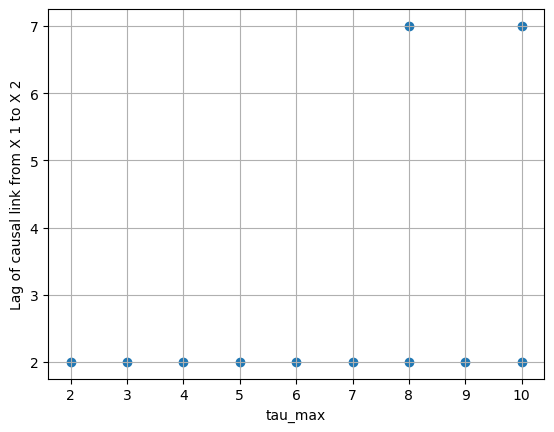

In [4]:
import matplotlib.pyplot as plt
from toolbox import post_processing_functions as ppf
import importlib
importlib.reload(ppf)

tau_min=1
# Lists to store tau_max values and corresponding lags
tau_max_values = []
lag_values = []

# Loop over tau_max from 2 to 10
for tau_max in range(2, 11):
    # Run PCMCI with the current tau_max
    results = pcmci.run_pcmci(tau_max=tau_max, tau_min=tau_min, pc_alpha=None, alpha_level=0.01)
    
    # Extract causal links
    N = results['p_matrix'].shape[0]
    results_text = ppf.print_significant_links(
        N, var_names, p_matrix=results['p_matrix'],
        val_matrix=results['val_matrix'], alpha_level=0.05
    )
    causal_links = ppf.parse_results_to_dict(results_text, var_names)
    
    # Check for causal links from 'X 1' to 'X 2'
    if 'X 2' in causal_links:
        for link in causal_links['X 2']:
            if link['cause'] == 'X 1':
                # Store the tau_max and corresponding lag
                tau_max_values.append(tau_max)
                lag_values.append(-link['lag'])  # Use negative lag for plotting
                
# Create the scatter plot
plt.scatter(tau_max_values, lag_values)
plt.xlabel('tau_max')
plt.ylabel('Lag of causal link from X 1 to X 2')
# plt.title('Causal Link Lags from X 1 to X 2 vs tau_max')
plt.xticks(range(2, 11))
plt.grid(True)
plt.show()
